In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [161]:
data = pd.read_csv('applerevenue.csv')
data.head()

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


In [162]:
data.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB


In [224]:
data.corr()

,open,high,low,close,volume,profit
open,1.000000,0.999941,0.999926,0.999844,-0.219316,-0.000861
high,0.999941,1.000000,0.999913,0.999926,-0.218785,-0.003254
low,0.999926,0.999913,1.000000,0.999928,-0.220155,-0.003508
close,0.999844,0.999926,0.999928,1.000000,-0.219485,-0.006072
volume,-0.219316,-0.218785,-0.220155,-0.219485,1.000000,0.019101
profit,-0.000861,-0.003254,-0.003508,-0.006072,0.019101,1.000000


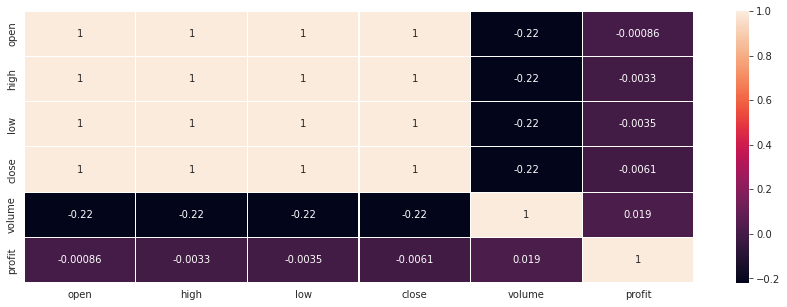

In [225]:
plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(), linewidths=.1, annot=True)

In [167]:
data.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64

In [168]:
data.shape

(10559, 7)

In [169]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')

In [170]:
data['profit'] = data['profit or not']
data.drop('profit or not',axis=1,inplace=True)

In [171]:
def to_yr(date):
    return date[6:]

In [172]:
data['year'] = data['date'].apply(to_yr)

In [173]:
data_model = data.drop(['date','year','profit','volume'],axis=1)

In [174]:
data.head()

,date,open,high,low,close,volume,profit,year
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0,1980
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1,1980
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1,1980
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0,1980
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0,1980


In [175]:
data_model.head()

,open,high,low,close
0,0.1003,0.1007,0.1003,0.1003
1,0.0955,0.0955,0.0951,0.0951
2,0.0885,0.0885,0.0881,0.0881
3,0.0902,0.0907,0.0902,0.0902
4,0.0929,0.0933,0.0929,0.0929


In [176]:
data_grouped = pd.DataFrame(data.groupby('year')['close'].mean())
data_grouped.reset_index(inplace=True)
data_grouped.head()

,year,close
0,1980,0.106200
1,1981,0.084803
2,1982,0.066778
3,1983,0.130890
4,1984,0.093491


Visualisation

In [177]:
sns.set_style('darkgrid')

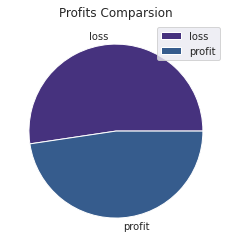

In [178]:
plt.pie(data['profit'].value_counts(),labels=['loss','profit'])
plt.title('Profits Comparsion')
plt.legend()

Text(0.5, 1.0, 'Graphs of Mean of Final Values per year')

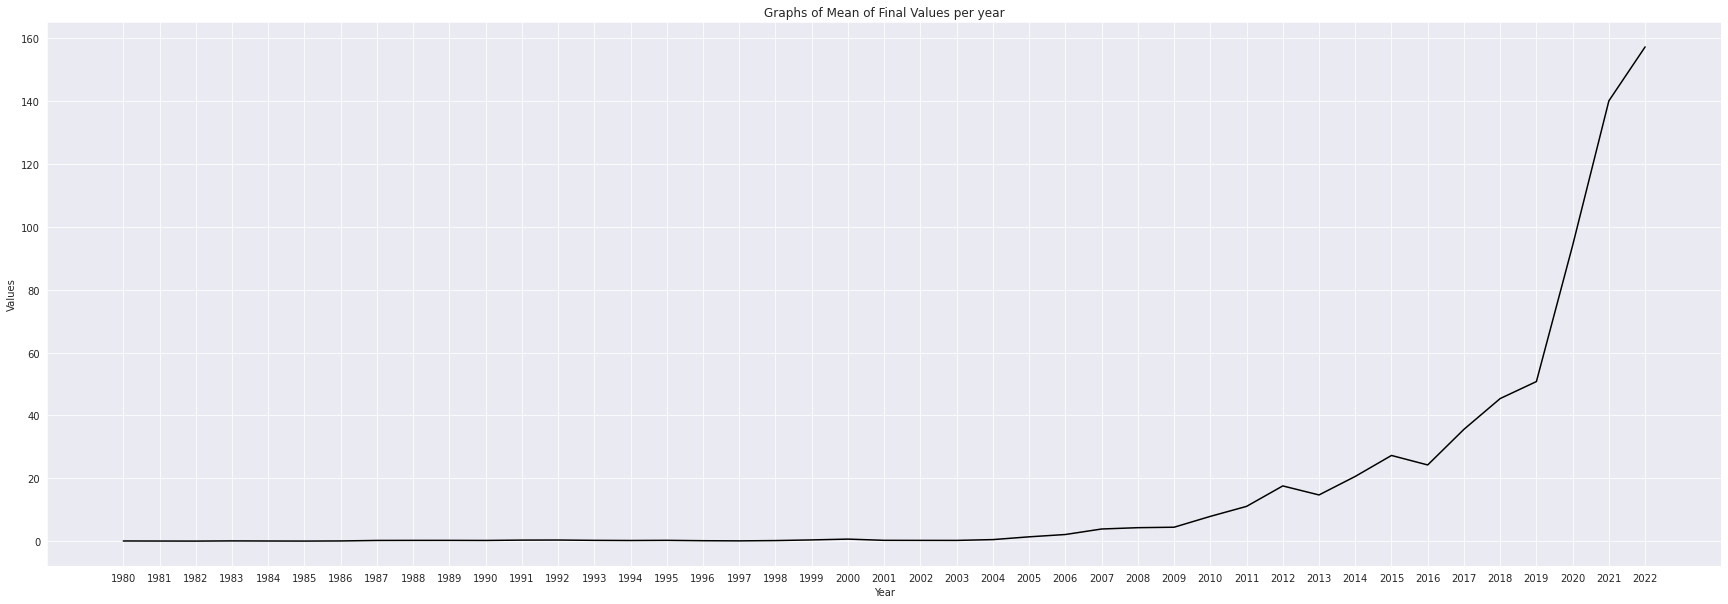

In [179]:
plt.figure(figsize=(30,10))
plt.plot(data_grouped['year'],data_grouped['close'],color='black')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Graphs of Mean of Final Values per year')

Text(0.5, 1.0, 'Open vs Close Values Comparsion')

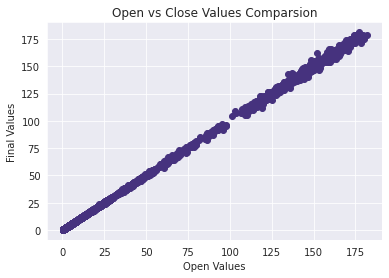

In [180]:
sns.set_palette('viridis')
plt.scatter(x='open',y='close',data=data)
plt.xlabel('Open Values')
plt.ylabel('Final Values')
plt.title('Open vs Close Values Comparsion')

Model Operations

In [254]:
X = data_model
y = data['profit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [199]:
from sklearn.linear_model import LogisticRegression 

In [200]:
log = LogisticRegression()
log.fit(X_train,y_train)

pred_log = log.predict(X_test)
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

[[1798    2]
 [ 736  949]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1800
           1       1.00      0.56      0.72      1685

    accuracy                           0.79      3485
   macro avg       0.85      0.78      0.77      3485
weighted avg       0.85      0.79      0.78      3485



K Nearest Neighbors - KNN

In [274]:
scaler = StandardScaler()
scaler.fit(data_model)

X_train,X_test,y_train,y_test = train_test_split(scaler.transform(data_model),data['profit'],test_size=0.33,random_state=101)
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10559, 4) (7074, 4) (3485, 4) (7074,) (3485,)


In [276]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)
print('Model accuracy score:', accuracy_score(y_test, pred_knn))

Model accuracy score: 0.8619799139167862


In [277]:
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1800
           1       0.87      0.84      0.85      1685

    accuracy                           0.86      3485
   macro avg       0.86      0.86      0.86      3485
weighted avg       0.86      0.86      0.86      3485

[[1588  212]
 [ 269 1416]]


Support Vector Machines - SVM

In [278]:
param_grid = {'C':[0.001,0.1,1,10,100,1000,10000,100000],
              'gamma':[0.1,0.01,0.001,0.0001,0.00001,0.00001,0.000001],
              'kernel':['rbf']}

In [279]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [280]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.527 total time=   2.5s
[CV 2/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.527 total time=   1.3s
[CV 3/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.527 total time=   1.3s
[CV 4/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.527 total time=   1.3s
[CV 5/5] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.527 total time=   1.3s
[CV 1/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.527 total time=   1.3s
[CV 2/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.527 total time=   1.3s
[CV 3/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.527 total time=   1.3s
[CV 4/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.527 total time=   1.4s
[CV 5/5] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.527 total time=   1.3s
[CV 1/5] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.527 total time=   1.3s
[CV 2/5] END ..C=0.001, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-05,
                                   1e-06],
                         'kernel': ['rbf']},
             verbose=3)

In [282]:
predict_svm = grid.predict(X_test)

print(classification_report(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1800
           1       0.99      0.76      0.86      1685

    accuracy                           0.88      3485
   macro avg       0.90      0.88      0.88      3485
weighted avg       0.90      0.88      0.88      3485

[[1790   10]
 [ 401 1284]]


In [283]:
grid.best_estimator_

SVC(C=100000, gamma=0.1)

In [284]:
grid.best_score_

0.875035810496749

Kesimpulan:
Hasil prediksi dari SVM lebih tinggi dari model KNN